Dataset - "Cars dataset" 

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('car_price_dataset.csv')

# Display the first few rows
print(df.head())
# Check for missing values in each column
print(df.isnull().sum())

# Handle missing values (if any)
df = df.fillna('Unknown')  # Fill missing values with 'Unknown' or appropriate value
# Check data types of all columns
print(df.info())

# Convert columns to appropriate data types if needed
df['Year'] = df['Year'].astype(int)
df['Engine_Size'] = df['Engine_Size'].astype(float)
df['Mileage'] = df['Mileage'].astype(int)
df['Doors'] = df['Doors'].astype(int)
df['Owner_Count'] = df['Owner_Count'].astype(int)
df['Price'] = df['Price'].astype(int)


        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dty

# Car Price Dataset Preprocessing

This script preprocesses a car price dataset using pandas.

### Steps:
1. **Load Dataset**: Reads `car_price_dataset.csv` into a DataFrame.
2. **Display Data**: Prints the first few rows.
3. **Check Missing Values**: Identifies missing data.
4. **Handle Missing Values**: Fills missing entries with `'Unknown'`.
5. **Check Data Types**: Displays column types.
6. **Convert Data Types**: Ensures proper numerical formats.

### Key Conversions:
- `Year`, `Mileage`, `Doors`, `Owner_Count`, `Price` → `int`
- `Engine_Size` → `float`


In [5]:
# Drop unnecessary columns (if any)
df = df.dropna()  # Example: Drop an unnamed column
# Check for duplicate rows
print(df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()
# Get summary statistics for numerical columns
print(df.describe())

0
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  


# Data Cleaning & Summary Statistics

### Steps:
1. **Drop Unnecessary Columns**: Removes missing values using `dropna()`.
2. **Check for Duplicates**: Identifies duplicate rows.
3. **Remove Duplicates**: Drops duplicate entries using `drop_duplicates()`.
4. **Summary Statistics**: Displays statistical insights using `describe()`.


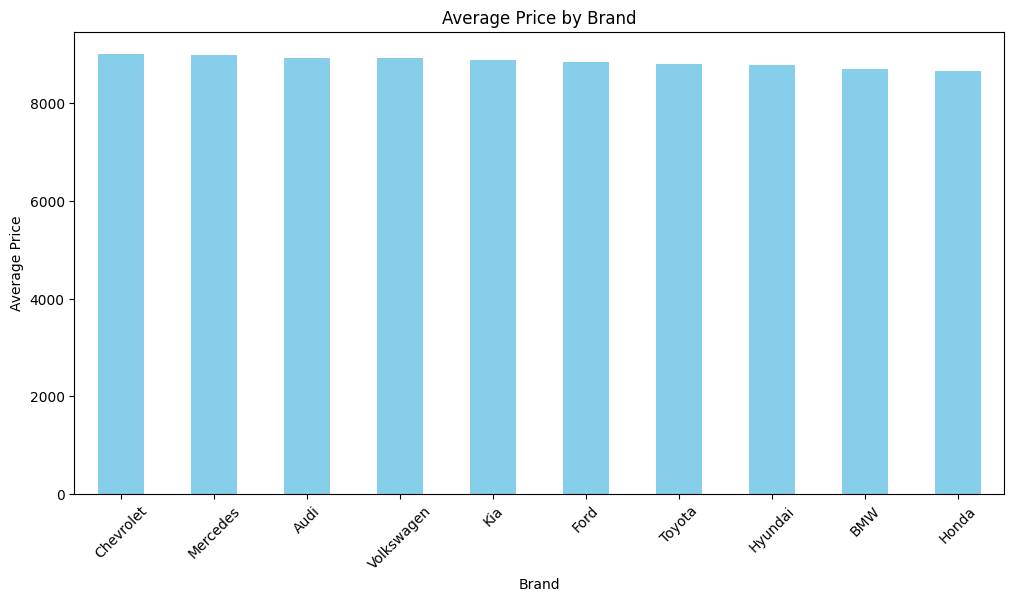

In [6]:
import matplotlib.pyplot as plt

# Group by Brand and calculate average price
avg_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_price_by_brand.plot(kind='bar', color='skyblue')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Average Car Price by Brand

### Steps:
- Group data by `Brand` and calculate the average price.  
- Sort values in descending order.  
- Plot a bar chart using `matplotlib`.  


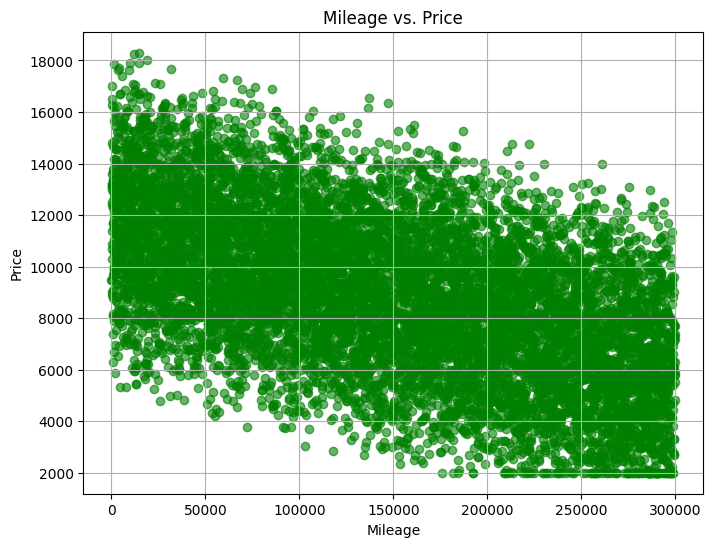

In [7]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Mileage'], df['Price'], alpha=0.6, color='green')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Mileage vs. Price Scatter Plot

### Steps:
- Plot `Mileage` vs. `Price` using a scatter plot.  
- Adjust figure size and transparency (`alpha`).  
- Add labels, title, and grid for clarity.  


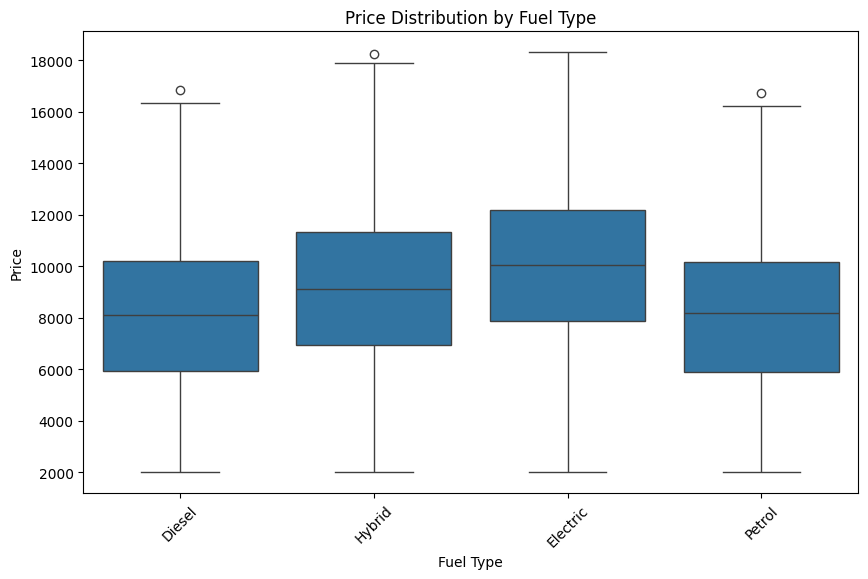

In [8]:
import seaborn as sns

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Price Distribution by Fuel Type

### Steps:
- Create a box plot of `Price` by `Fuel_Type` using Seaborn.  
- Set figure size and rotate x-axis labels for readability.  
- Add title and axis labels.  


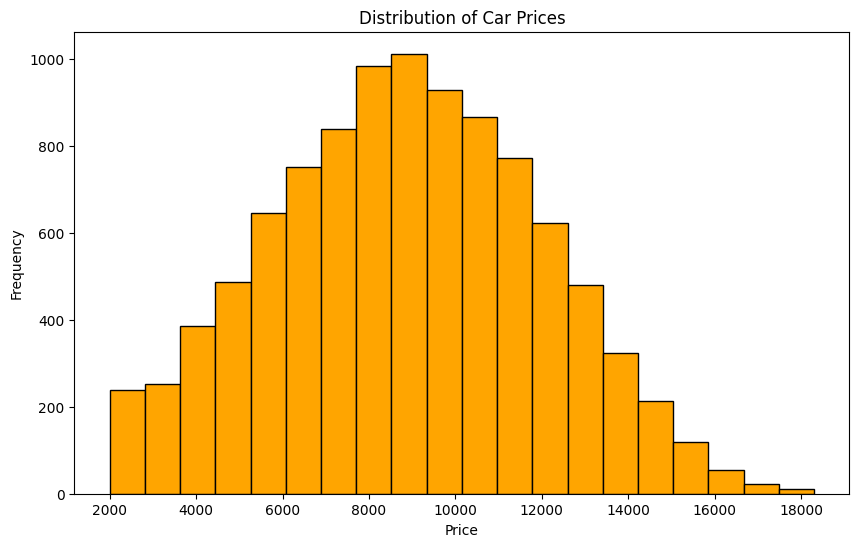

In [9]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of Car Prices

### Steps:
- Plot a histogram of `Price` with 20 bins.  
- Set figure size, color, and edge color.  
- Add title and axis labels.  


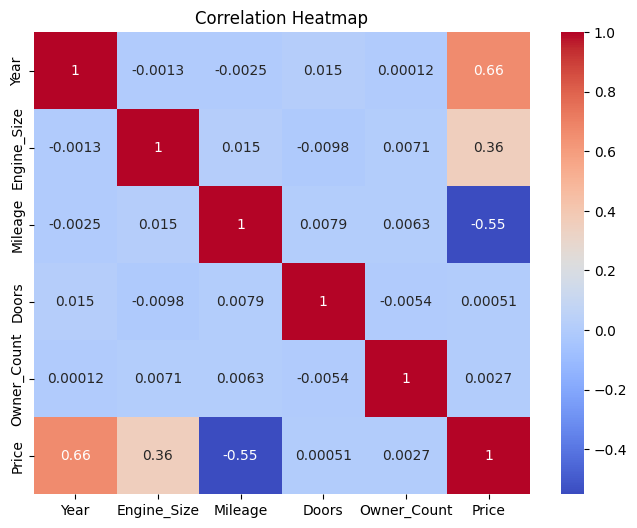

In [10]:
# Correlation matrix
correlation_matrix = df[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Heatmap

### Steps:
- Compute the correlation matrix for numerical columns.  
- Visualize correlations using a heatmap with annotations.  
- Apply the `coolwarm` color map for clarity.  


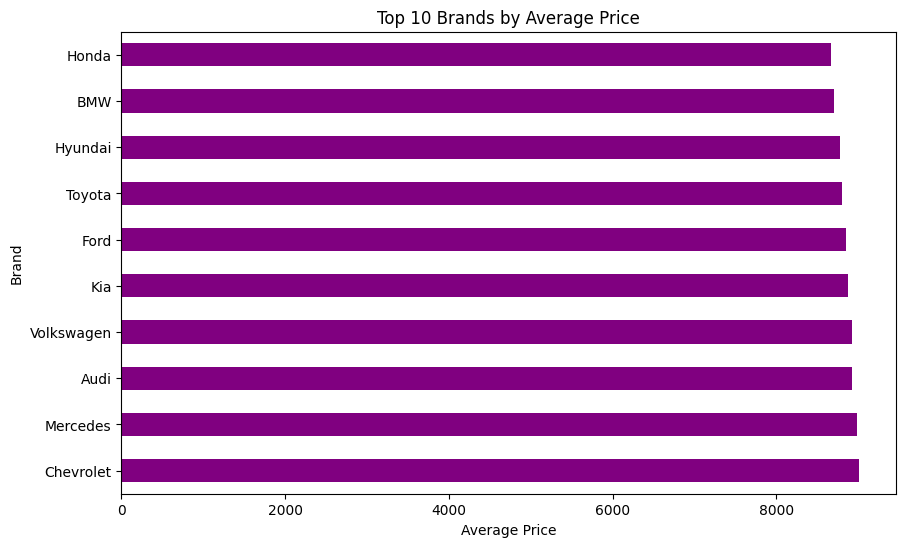

In [11]:
# Group by Brand and calculate average price
top_brands = df.groupby('Brand')['Price'].mean().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_brands.plot(kind='barh', color='purple')
plt.title('Top 10 Brands by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()

# Top 10 Brands by Average Price

### Steps:
- Group by `Brand` and compute the average price.  
- Select the top 10 brands using `nlargest(10)`.  
- Plot a horizontal bar chart.  


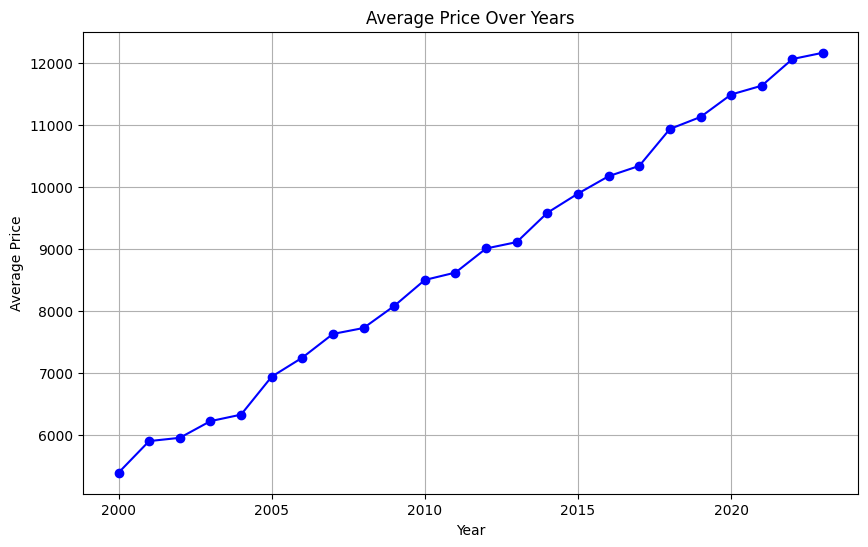

In [12]:
# Group by Year and calculate average price
avg_price_by_year = df.groupby('Year')['Price'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='blue')
plt.title('Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Average Price Over Years

### Steps:
- Group by `Year` and compute the average price.  
- Plot a line chart with markers.  
- Add grid for better readability.  


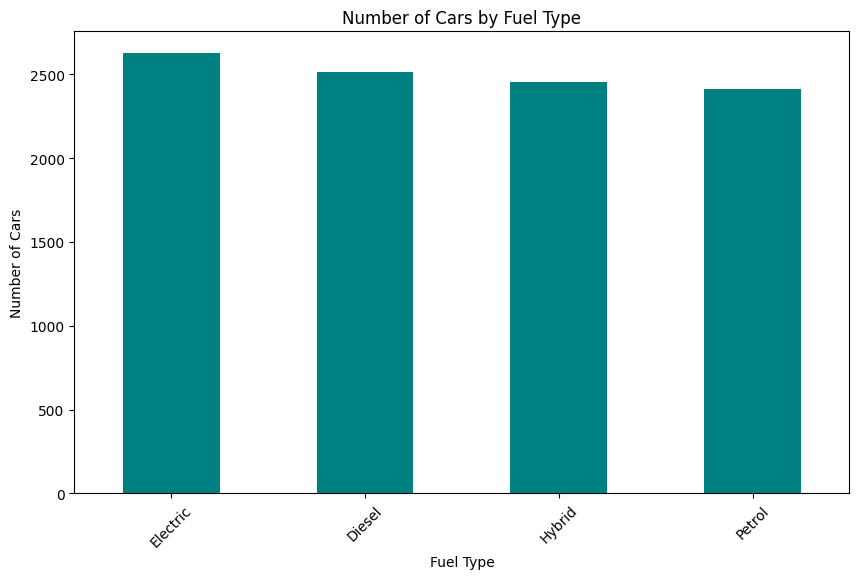

In [13]:
# Count cars by Fuel Type
fuel_type_counts = df['Fuel_Type'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
fuel_type_counts.plot(kind='bar', color='teal')
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

# Number of Cars by Fuel Type

### Steps:
- Count occurrences of each `Fuel_Type`.  
- Plot a bar chart.  
- Rotate x-axis labels for clarity.  


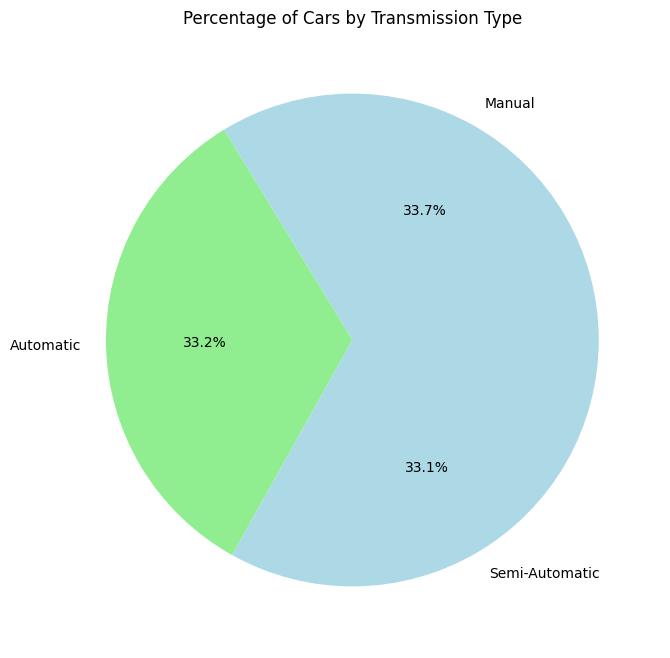

In [14]:
# Count cars by Transmission
transmission_counts = df['Transmission'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Cars by Transmission Type')
plt.show()

# Percentage of Cars by Transmission Type

### Steps:
- Count occurrences of each `Transmission` type.  
- Plot a pie chart with percentage labels.  
- Customize colors for better visualization.  


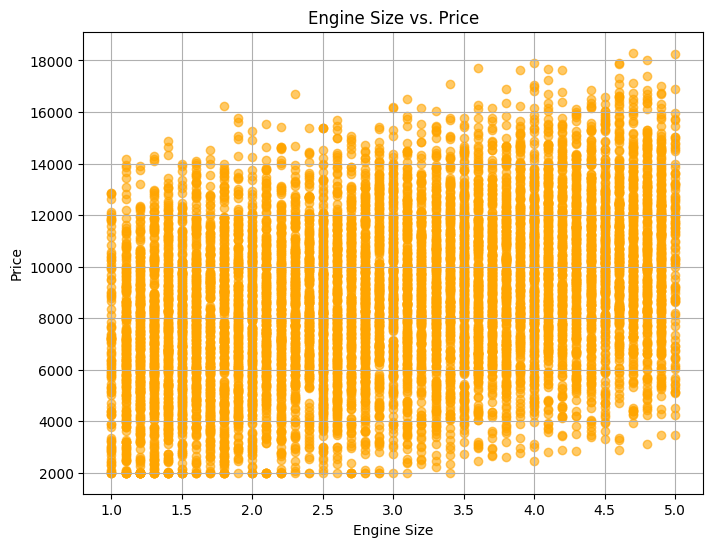

In [15]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine_Size'], df['Price'], alpha=0.6, color='orange')
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Engine Size vs. Price Scatter Plot

### Steps:
- Plot `Engine_Size` vs. `Price` using a scatter plot.  
- Adjust figure size and transparency (`alpha`).  
- Add labels, title, and grid for clarity.  


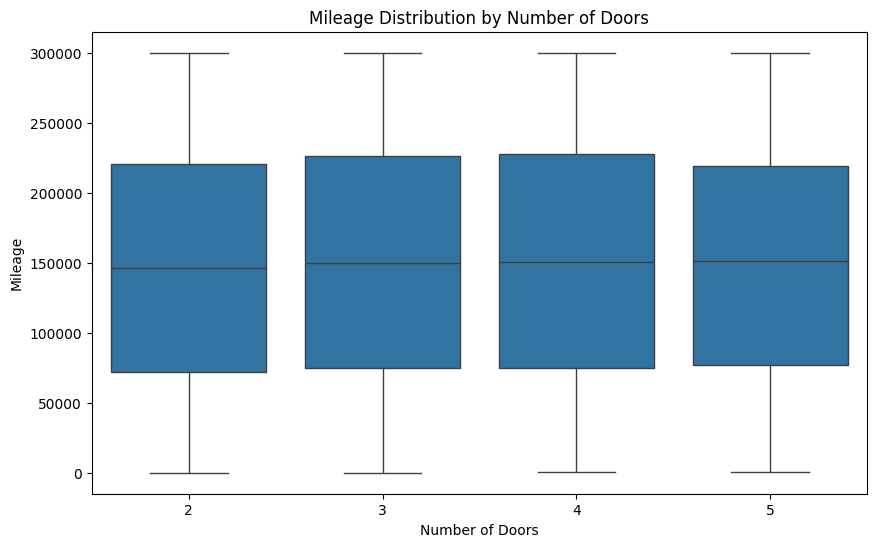

In [16]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Doors', y='Mileage', data=df)
plt.title('Mileage Distribution by Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Mileage')
plt.show()

# Mileage Distribution by Number of Doors

### Steps:
- Create a box plot of `Mileage` by `Doors`.  
- Set figure size and add labels for clarity.  


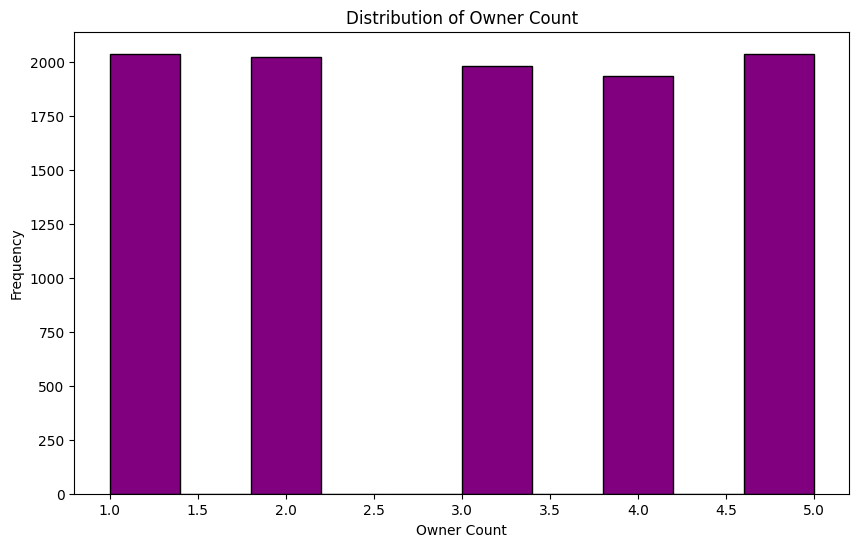

In [17]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Owner_Count'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Owner Count')
plt.xlabel('Owner Count')
plt.ylabel('Frequency')
plt.show()

# Distribution of Owner Count

### Steps:
- Plot a histogram of `Owner_Count` with 10 bins.  
- Set figure size, color, and edge color.  
- Add title and axis labels.  


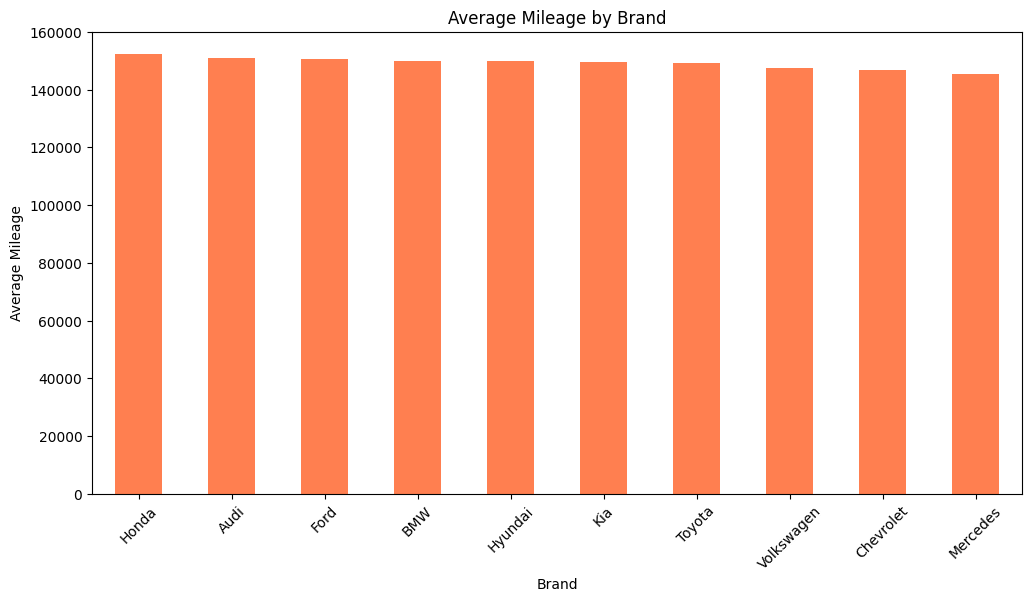

In [18]:
# Group by Brand and calculate average mileage
avg_mileage_by_brand = df.groupby('Brand')['Mileage'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_mileage_by_brand.plot(kind='bar', color='coral')
plt.title('Average Mileage by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Mileage')
plt.xticks(rotation=45)
plt.show()

# Average Mileage by Brand

### Steps:
- Group by `Brand` and compute the average `Mileage`.  
- Sort values in descending order.  
- Plot a bar chart for visualization.  


<Figure size 1200x600 with 0 Axes>

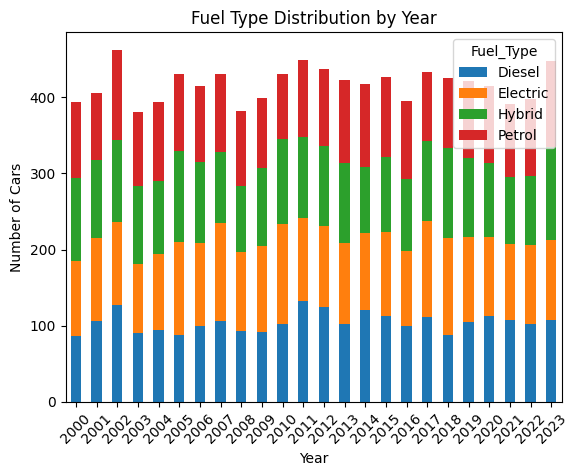

In [19]:
# Group by Year and Fuel Type
fuel_type_by_year = df.groupby(['Year', 'Fuel_Type']).size().unstack()

# Plot
plt.figure(figsize=(12, 6))
fuel_type_by_year.plot(kind='bar', stacked=True)
plt.title('Fuel Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

# Fuel Type Distribution by Year

### Steps:
- Group data by `Year` and `Fuel_Type`.  
- Create a stacked bar chart for visualization.  
- Rotate x-axis labels for better readability.  


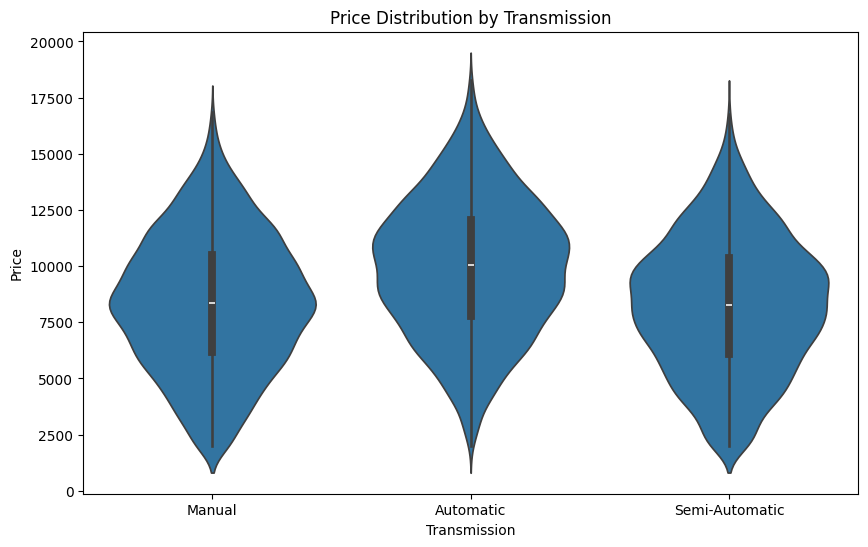

In [20]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Transmission', y='Price', data=df)
plt.title('Price Distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

# Price Distribution by Transmission

### Steps:
- Create a violin plot of `Price` by `Transmission`.  
- Set figure size and add labels for clarity.  


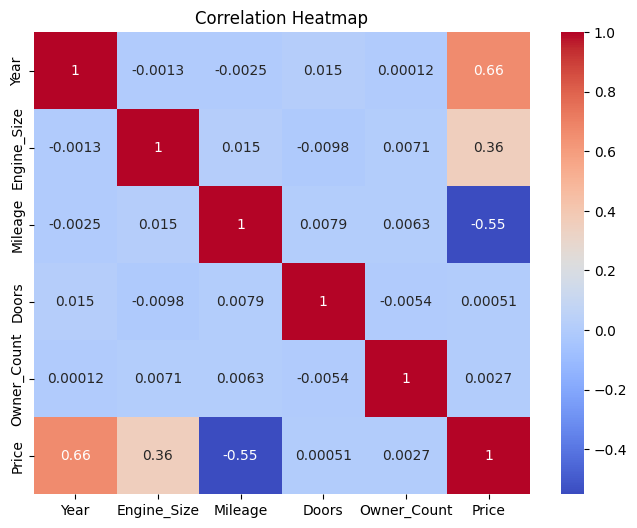

In [21]:
# Correlation matrix
correlation_matrix = df[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Heatmap

### Steps:
- Compute correlation matrix for numerical features.  
- Visualize relationships using a heatmap with annotations.  
- Apply the `coolwarm` color scheme for clarity.  


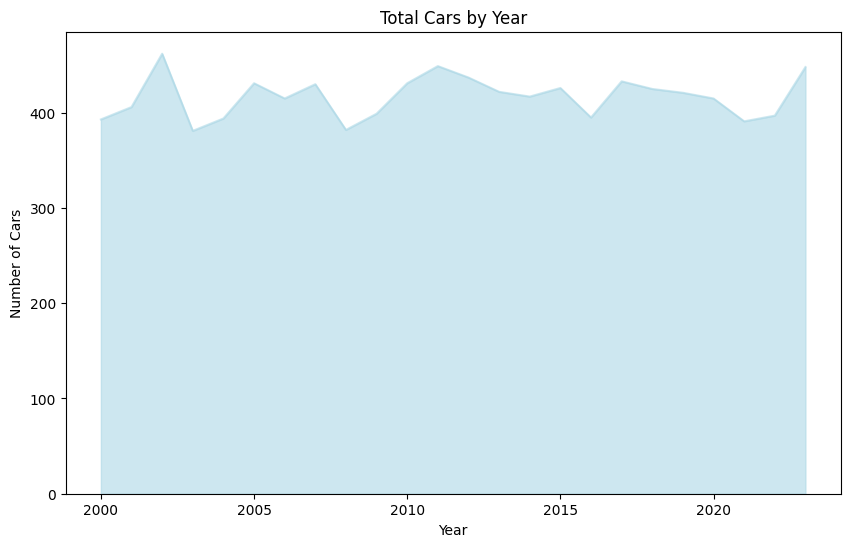

In [22]:
# Group by Year and count cars
cars_by_year = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
cars_by_year.plot(kind='area', color='lightblue', alpha=0.6)
plt.title('Total Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

# Total Cars by Year

### Steps:
- Count cars for each `Year` and sort the index.  
- Plot an area chart with transparency (`alpha`).  
- Add title and axis labels for clarity.  


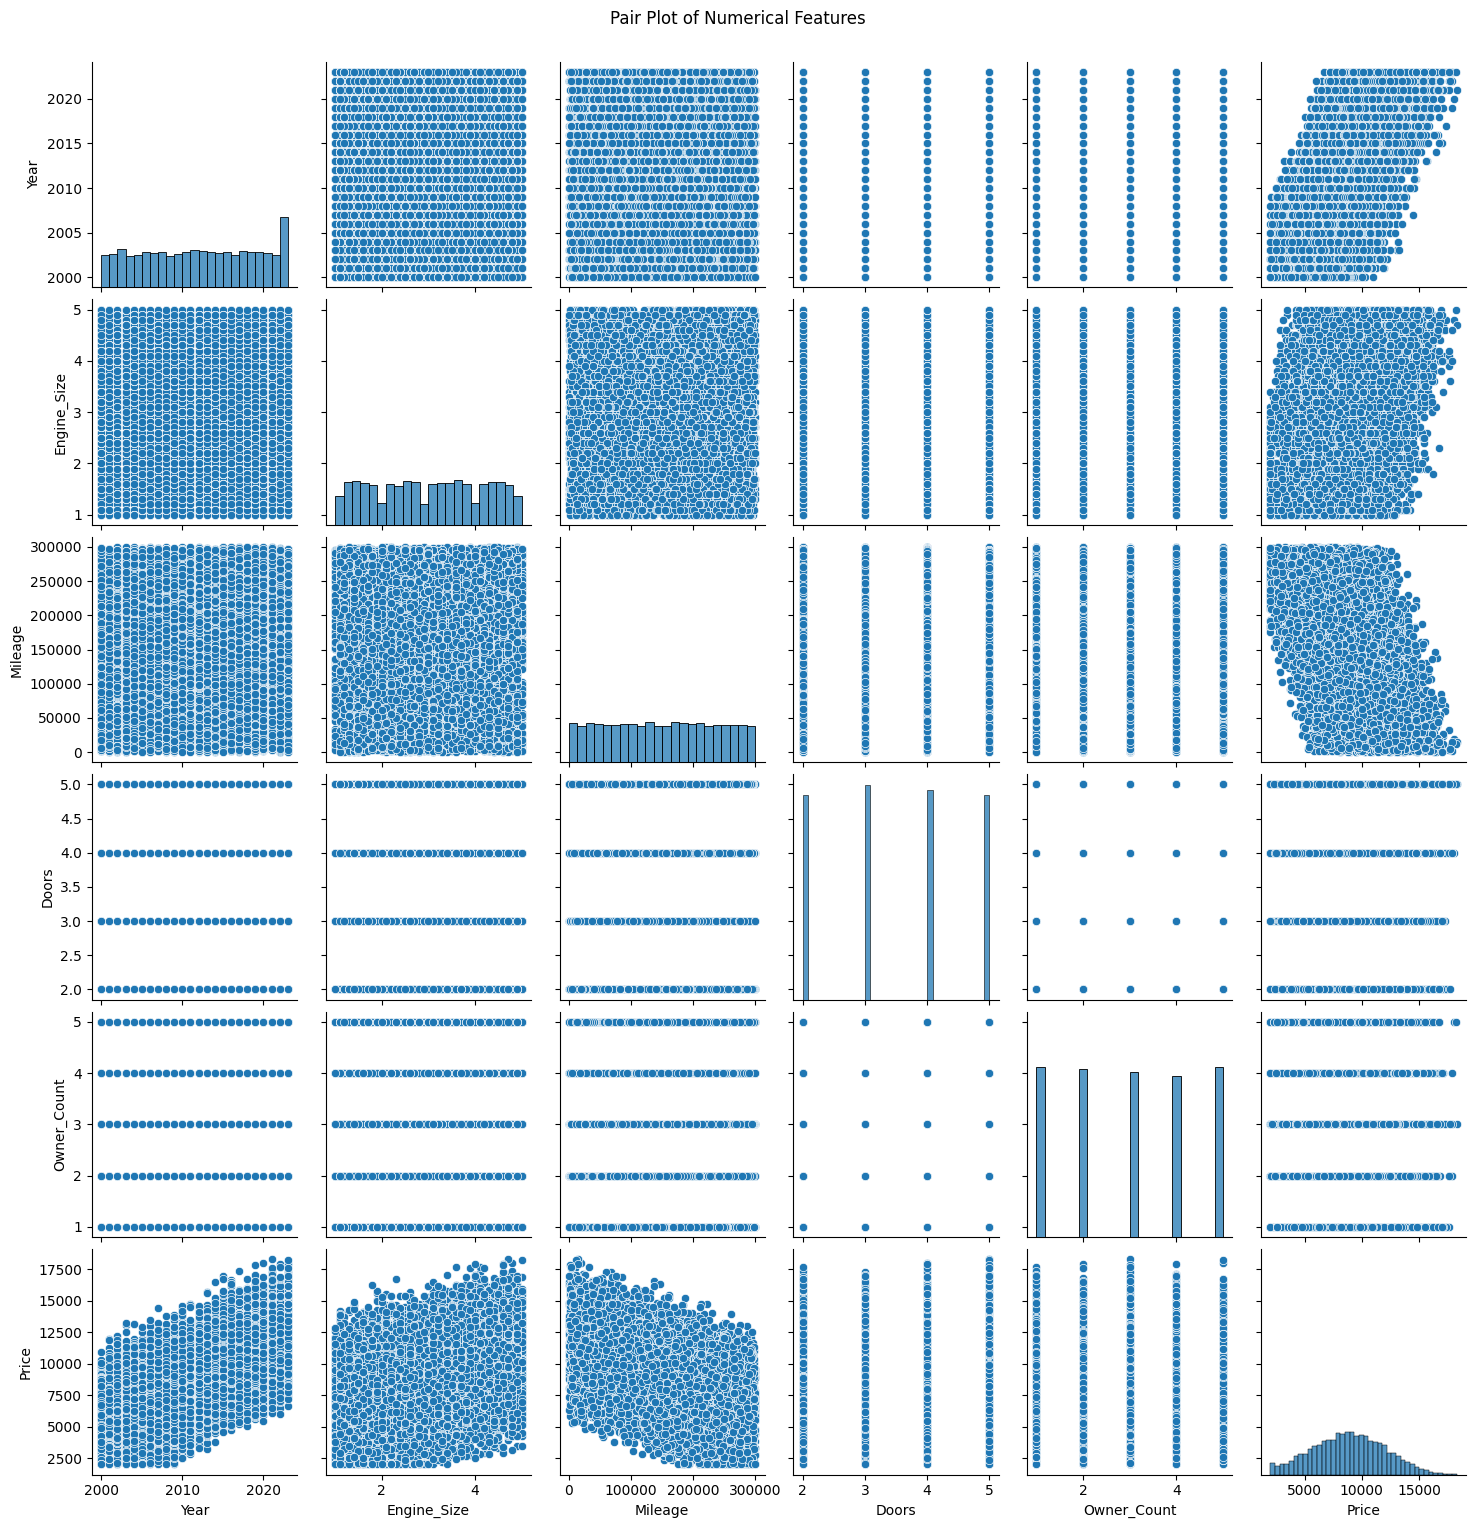

In [23]:
# Pair plot
sns.pairplot(df[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Pair Plot of Numerical Features

### Steps:
- Select numerical features for visualization.  
- Generate a pair plot to show relationships between variables.  
- Add a title and adjust spacing for better readability.  
